<a href="https://colab.research.google.com/github/varsha0725-prog/Amazon-Review-/blob/main/customer_review_sentiment_analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset Shape: (4915, 12)
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0  

/tmp/ipython-input-86755613.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


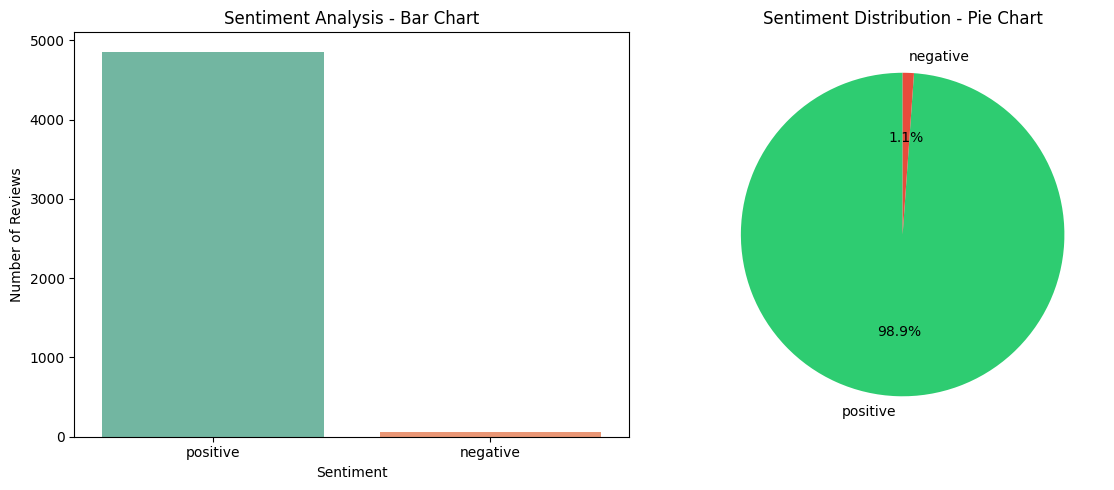

In [1]:
# =========================================
# 0. Install Required Libraries (Colab Safe)
# =========================================
!pip install -q pandas numpy matplotlib seaborn scikit-learn nltk

# =========================================
# 1. Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')

# =========================================
# 2. Load Dataset
# =========================================
file_path = "/content/amazon_reviews.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())

# =========================================
# 3. Data Cleaning
# =========================================
df = df.dropna(subset=["reviewText", "overall"]) # Changed 'review' to 'reviewText'
df["sentiment"] = df["overall"].apply(lambda rating: "positive" if rating >= 3 else "negative") # Create 'sentiment' from 'overall'
df["sentiment"] = df["sentiment"].str.lower()

print("\nSentiment Count:\n", df["sentiment"].value_counts())

# =========================================
# 4. Train-Test Split
# =========================================
X = df["reviewText"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================================
# 5. NLP Model (TF-IDF + Logistic Regression)
# =========================================
model = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        max_features=5000
    )),
    ("classifier", LogisticRegression())
])

model.fit(X_train, y_train)

# =========================================
# 6. Prediction & Accuracy
# =========================================
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("\n==============================")
print("MODEL ACCURACY:", round(accuracy * 100, 2), "%")
print("==============================\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# =========================================
# 7. Overall Product Sentiment
# =========================================
df["predicted_sentiment"] = model.predict(df["reviewText"])

sentiment_counts = df["predicted_sentiment"].value_counts()
positive = sentiment_counts.get("positive", 0)
negative = sentiment_counts.get("negative", 0)

print("\nOverall Sentiment Count:\n", sentiment_counts)

print("\n==============================")
print("FINAL PRODUCT DECISION")
print("==============================")

if positive > negative:
    print("✅ Majority Reviews: POSITIVE")
    print("📢 Business Suggestion: GIVE OFFERS & DISCOUNTS to increase sales 📈")
else:
    print("❌ Majority Reviews: NEGATIVE")
    print("🔧 Business Suggestion: PRODUCT UPGRADE & QUALITY IMPROVEMENT needed")

# =========================================
# 8. Visualization
# =========================================
plt.figure(figsize=(12,5))

# Bar Chart
plt.subplot(1,2,1)
sns.countplot(
    x="predicted_sentiment",
    data=df,
    palette="Set2"
)
plt.title("Sentiment Analysis - Bar Chart")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Pie Chart
plt.subplot(1,2,2)
sentiment_counts.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=["#2ecc71", "#e74c3c"]
)
plt.title("Sentiment Distribution - Pie Chart")
plt.ylabel("")

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Shape: (4915, 12)
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0  

/tmp/ipython-input-1418595599.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


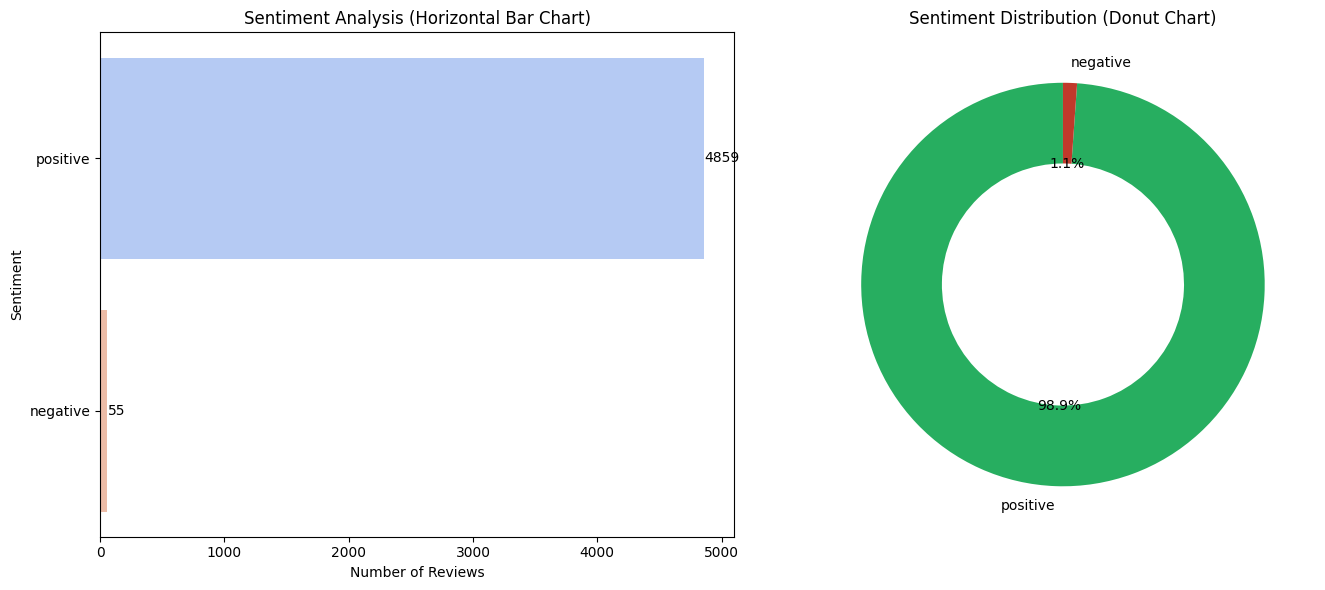

In [2]:
# =========================================
# 0. Install Required Libraries (Colab Safe)
# =========================================
!pip install -q pandas numpy matplotlib seaborn scikit-learn nltk

# =========================================
# 1. Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')

# =========================================
# 2. Load Dataset
# =========================================
file_path = "/content/amazon_reviews.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())

# =========================================
# 3. Data Cleaning
# =========================================
df = df.dropna(subset=["reviewText", "overall"])
df["sentiment"] = df["overall"].apply(lambda rating: "positive" if rating >= 3 else "negative")
df["sentiment"] = df["sentiment"].str.lower()

print("\nSentiment Count:\n", df["sentiment"].value_counts())

# =========================================
# 4. Train-Test Split
# =========================================
X = df["reviewText"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================================
# 5. NLP Model (TF-IDF + Logistic Regression)
# =========================================
model = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        max_features=5000
    )),
    ("classifier", LogisticRegression())
])

model.fit(X_train, y_train)

# =========================================
# 6. Prediction & Accuracy
# =========================================
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("\n==============================")
print("MODEL ACCURACY:", round(accuracy * 100, 2), "%")
print("==============================\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# =========================================
# 7. Overall Product Sentiment
# =========================================
df["predicted_sentiment"] = model.predict(df["reviewText"])

sentiment_counts = df["predicted_sentiment"].value_counts()
positive = sentiment_counts.get("positive", 0)
negative = sentiment_counts.get("negative", 0)

print("\nOverall Sentiment Count:\n", sentiment_counts)

print("\n==============================")
print("FINAL PRODUCT DECISION")
print("==============================")

if positive > negative:
    print("✅ Majority Reviews: POSITIVE")
    print("📢 Business Suggestion: GIVE OFFERS & DISCOUNTS to increase sales 📈")
else:
    print("❌ Majority Reviews: NEGATIVE")
    print("🔧 Business Suggestion: PRODUCT UPGRADE & QUALITY IMPROVEMENT needed")

# =========================================
# 8. Visualization (UPDATED CHARTS)
# =========================================
plt.figure(figsize=(14,6))

# -----------------------------------------
# 1️⃣ Horizontal Bar Chart with Count
# -----------------------------------------
plt.subplot(1,2,1)
sns.barplot(
    x=sentiment_counts.values,
    y=sentiment_counts.index,
    palette="coolwarm"
)
plt.title("Sentiment Analysis (Horizontal Bar Chart)")
plt.xlabel("Number of Reviews")
plt.ylabel("Sentiment")

# Value labels
for index, value in enumerate(sentiment_counts.values):
    plt.text(value + 5, index, str(value), va='center')

# -----------------------------------------
# 2️⃣ Donut Chart
# -----------------------------------------
plt.subplot(1,2,2)
colors = ["#27ae60", "#c0392b"]

plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"width":0.4}   # Donut style
)
plt.title("Sentiment Distribution (Donut Chart)")

plt.tight_layout()
plt.show()
